In [2]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
%matplotlib inline 



titanic_train = pd.read_csv('D:\\Python\\all\\train.csv')
titanic_test = pd.read_csv('D:\\Python\\all\\test.csv')
combine = [titanic_train, titanic_test]
titanic_test.shape

titanic_test.head(10)

def clean_data(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())

    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1

    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2

        
def write_prediction(prediction, name):
    PassengerId = np.array(titanic_test["PassengerId"]).astype(int)
    solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])
    solution.to_csv(name, index_label = ["PassengerId"])



In [10]:
print(titanic_train.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [12]:

# header data
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# tail data
titanic_train .tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [18]:
titanic_train.info()
print('_'*60)
titanic_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
____________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket 

In [19]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
titanic_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sutton, Mr. Frederick",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [16]:

import numpy as np
import pandas as pd
from sklearn import linear_model,preprocessing, model_selection

titanic_train = pd.read_csv('D:\\Python\\all\\train.csv')
titanic_test = pd.read_csv('D:\\Python\\all\\test.csv')
def clean_data(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())

    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1

    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2

def write_prediction(prediction, name):
    PassengerId = np.array(titanic_test["PassengerId"]).astype(int)
    solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])
    solution.to_csv(name, index_label = ["PassengerId"])

print ("\nCleaning the data")

clean_data(titanic_train)
clean_data(titanic_test)

print ("\nExtracting target and features")

print(titanic_train.shape)
target = titanic_train["Survived"].values
features = titanic_train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

print ("\nUse logistic regression")

logistic = linear_model.LogisticRegression()
logistic.fit(features, target)
print(logistic.score(features, target) )

scores = model_selection.cross_val_score(logistic, features, target, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

test_features = titanic_test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
data = write_prediction(logistic.predict(test_features),"D:\\Python\\results\\logistic_regression.csv")

print(data)

print ("\nUse polynomial features")
poly = preprocessing.PolynomialFeatures(degree=2)
features_ = poly.fit_transform(features)

clf = linear_model.LogisticRegression(C=10)
clf.fit(features_, target)
print (clf.score(features_, target))

scores = model_selection.cross_val_score(clf, features_, target, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

test_features_ = poly.fit_transform(test_features)
write_prediction(clf.predict(test_features_),"D:\\Python\\results\\logistic_regression_poly.csv")


Cleaning the data

Extracting target and features
(891, 12)

Use logistic regression
0.7991021324354658
[0.77777778 0.78888889 0.7752809  0.83146067 0.78651685 0.7752809
 0.78651685 0.7752809  0.82022472 0.81818182]
0.7935410282601294
None

Use polynomial features
0.8361391694725028
[0.83333333 0.82222222 0.76404494 0.88764045 0.84269663 0.78651685
 0.80898876 0.7752809  0.86516854 0.84090909]
0.8226801725116332


In [22]:
import numpy as np
import pandas as pd
from sklearn import ensemble, model_selection

titanic_train = pd.read_csv('D:\\Python\\all\\train.csv')
titanic_test = pd.read_csv('D:\\Python\\all\\test.csv')
def clean_data(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())

    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1

    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2

def write_prediction(prediction, name):
    PassengerId = np.array(titanic_test["PassengerId"]).astype(int)
    solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])
    solution.to_csv(name, index_label = ["PassengerId"])

print ("\nCleaning the data")

clean_data(titanic_train)
clean_data(titanic_test)

print ("\nExtracting target and features")

print(titanic_train.shape)
target = titanic_train["Survived"].values
features_forest = titanic_train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

print ("\nUse Random Forest classifier")

forest = ensemble.RandomForestClassifier(
    max_depth = 7,
    min_samples_split = 4,
    n_estimators = 1000,
    random_state = 1,
    n_jobs = -1
)
forest = forest.fit(features_forest, target)

print(forest.feature_importances_)
print(forest.score(features_forest, target))

scores = model_selection.cross_val_score(forest, features_forest, target, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

test_features_forest = titanic_test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
prediction_forest = forest.predict(test_features_forest)
write_prediction(prediction_forest, "D:\\Python\\results\\random_forest.csv")


Cleaning the data

Extracting target and features
(891, 12)

Use Random Forest classifier
[0.12765467 0.14461609 0.40192252 0.19655999 0.05586411 0.03997785
 0.03340478]
0.8866442199775533
[0.77777778 0.81111111 0.73033708 0.88764045 0.93258427 0.83146067
 0.80898876 0.7752809  0.86516854 0.84090909]
0.8261258653955282


In [29]:
import numpy as np
import pandas as pd
from sklearn import ensemble, model_selection
from sklearn import tree, model_selection

titanic_train = pd.read_csv('D:\\Python\\all\\train.csv')
titanic_test = pd.read_csv('D:\\Python\\all\\test.csv')
def clean_data(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())

    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1
gjig
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2

def write_prediction(prediction, name):
    PassengerId = np.array(titanic_test["PassengerId"]).astype(int)
    solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])
    solution.to_csv(name, index_label = ["PassengerId"])

print ("\nCleaning the data")

clean_data(titanic_train)
clean_data(titanic_test)
print ("\nExtracting target and features")

print(titanic_train.shape)
target = titanic_train["Survived"].values
features = titanic_train[["Pclass", "Sex", "Age", "Fare"]].values

decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree = decision_tree.fit(features, target)

print(decision_tree.feature_importances_)
print(decision_tree.score(features, target))

print ("\nTry on test set")

test_features = titanic_test[["Pclass", "Sex", "Age", "Fare"]].values
prediction = decision_tree.predict(test_features)
write_prediction(prediction, "D:\\Python\\results\\decision_tree.csv")

print ("\nCorrect overfitting")

feature_names = ["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]
features_two = titanic_train[feature_names].values
decision_tree_two = tree.DecisionTreeClassifier(
    max_depth = 7,
    min_samples_split = 2,
    random_state = 1)
decision_tree_two = decision_tree_two.fit(features_two, target)

print(decision_tree_two.feature_importances_)
print(decision_tree_two.score(features_two, target))
tree.export_graphviz(decision_tree_two, feature_names=feature_names, out_file="D:\\Users\\anit.singh\\Pictures\\decision_tree_two.txt")

scores = model_selection.cross_val_score(decision_tree_two, features_two, target, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

print ("\nWrite new predicition")

test_features_two = titanic_test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
prediction_two = decision_tree_two.predict(test_features_two)
write_prediction(prediction_two, "D:\\Python\\results\\decision_tree_two.csv")


Cleaning the data

Extracting target and features
(891, 12)
[0.1269655  0.31274009 0.23147703 0.32881738]
0.9775533108866442

Try on test set

Correct overfitting
[0.16289604 0.13683043 0.47976487 0.14661755 0.04973834 0.01414005
 0.01001273]
0.8787878787878788
[0.74444444 0.85555556 0.74157303 0.86516854 0.88764045 0.80898876
 0.82022472 0.75280899 0.85393258 0.86363636]
0.819397344228805

Write new predicition


In [4]:
import pandas as pd


titanic_train = pd.read_csv('D:\\Python\\all\\train.csv')
titanic_test = pd.read_csv('D:\\Python\\all\\test.csv')

print ("Survived / passed counts")
print(titanic_train["Survived"].value_counts())

print ("\nSurvived / passed as percentage")
print(titanic_train["Survived"].value_counts(normalize = True))

print ("\nMales survived / males passed")
print(titanic_train["Survived"][titanic_train["Sex"] == "male"].value_counts(normalize = True))

print ("\nFemals survived / females passed")
print(titanic_train["Survived"][titanic_train["Sex"] == "female"].value_counts(normalize = True))

print ("\nAdding a new Child column")
titanic_train["Child"] = float('NaN')
titanic_train.loc[titanic_train["Age"] >= 18, "Child"] = 0
titanic_train.loc[titanic_train["Age"] < 18, "Child"] = 1

print ("\nChildren survived / children passed")
print(titanic_train["Survived"][titanic_train["Child"] == 1].value_counts(normalize = True))

print ("\nPredict 1 if female and 0 if male")
test_one = titanic_test
test_one["Survived"] = 0
test_one.loc[test_one["Sex"] == 'female', "Survived"] = 1
test_one.to_csv("D:\\Python\\results\\gender_model.csv", index = False, columns = ["PassengerId", "Survived"])

print ("\nCheck how accurate this model is on training set")
titanic_train["Hyp"] = 0
titanic_train.loc[titanic_train["Sex"] == "female", "Hyp"] = 1

titanic_train["Result"] = 0
titanic_train.loc[titanic_train["Hyp"] == titanic_train["Survived"], "Result"] = 1
print(titanic_train["Result"].value_counts(normalize = True))

Survived / passed counts
0    549
1    342
Name: Survived, dtype: int64

Survived / passed as percentage
0    0.616162
1    0.383838
Name: Survived, dtype: float64

Males survived / males passed
0    0.811092
1    0.188908
Name: Survived, dtype: float64

Femals survived / females passed
1    0.742038
0    0.257962
Name: Survived, dtype: float64

Adding a new Child column

Children survived / children passed
1    0.539823
0    0.460177
Name: Survived, dtype: float64

Predict 1 if female and 0 if male

Check how accurate this model is on training set
1    0.786756
0    0.213244
Name: Result, dtype: float64


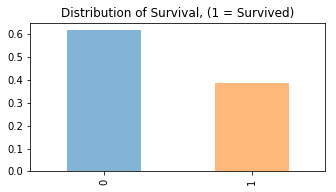

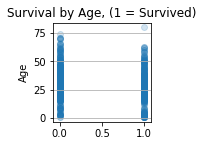

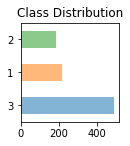

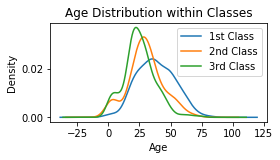

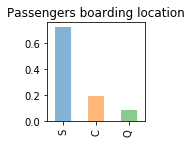

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# read csv
df = pd.read_csv('D:\\Python\\all\\train.csv')

# configure graph
fig = plt.figure(figsize=(18,6))
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

# survived vs deceased
plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Distribution of Survival, (1 = Survived)")
plt.show()
# survival by age
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b=True, which="major", axis="y")
plt.title("Survival by Age, (1 = Survived)")
plt.show()
# class distribution
plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
plt.title("Class Distribution")
plt.show()
# age distribution within class
plt.subplot2grid((2,3),(1,0), colspan=2)
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind="kde")
plt.xlabel("Age")
plt.title("Age Distribution within Classes")
plt.legend(("1st Class", "2nd Class", "3rd Class"))
plt.show()
# passengers boarding location
plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Passengers boarding location")

plt.show()

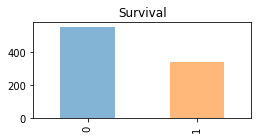

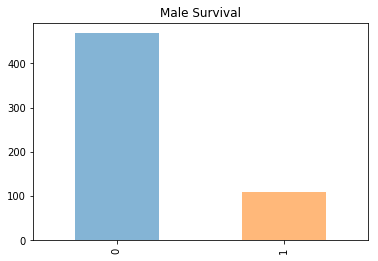

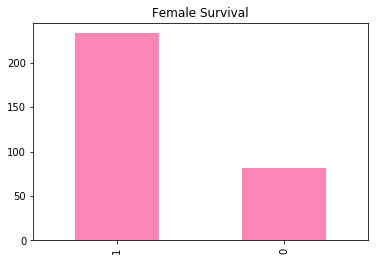

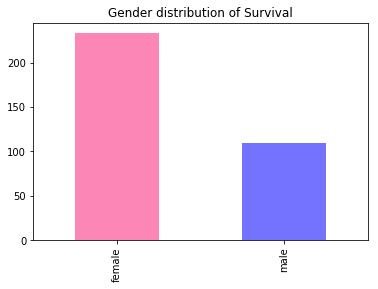

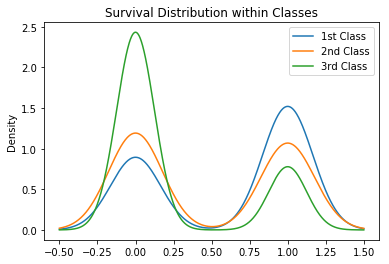

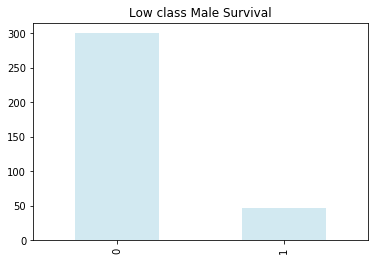

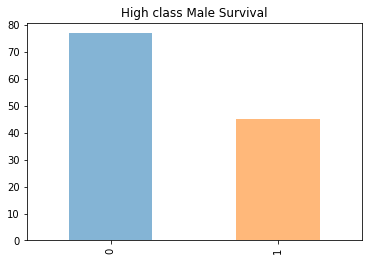

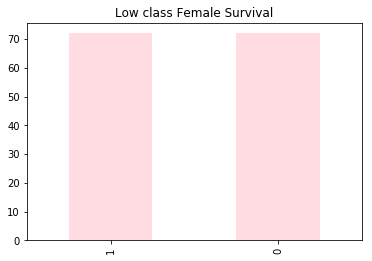

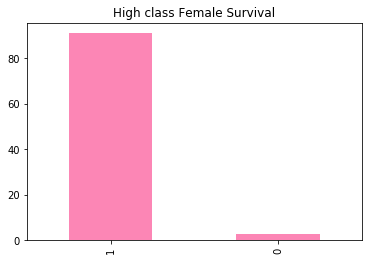

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

female_color = "#FA2379"

# read csv
df = pd.read_csv('D:\\Python\\all\\train.csv')

# configure graph
fig = plt.figure(figsize=(18,6))
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

# survived vs deceased
fig.add_subplot(3,4,1)
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Survival")
plt.show()

# male survived vs male deceased
fig.add_subplot(3,4,2)
df.Survived[df.Sex == "male"].value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Male Survival")
plt.show()

# female survived vs female deceased
fig.add_subplot(3,4,3)
df.Survived[df.Sex == "female"].value_counts().plot(kind='bar', color=female_color, alpha=alpha_bar_chart)
plt.title("Female Survival")
plt.show()

# gender distribution of survival
fig.add_subplot(3,4,4)
df[df.Survived == 1].Sex.value_counts().plot(kind='bar', color=[female_color, 'b'], alpha=alpha_bar_chart)
plt.title("Gender distribution of Survival")
plt.show()

# survival distribution within class
fig.add_subplot(3,1,2)
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.title("Survival Distribution within Classes")
plt.legend(("1st Class", "2nd Class", "3rd Class"))
plt.show()

# low class male survived vs male deceased
fig.add_subplot(3,4,9)
df.Survived[(df.Sex == "male") & (df.Pclass == 3)].value_counts().plot(kind='bar', color="lightblue", alpha=alpha_bar_chart)
plt.title("Low class Male Survival")
plt.show()

# high class male survived vs male deceased
fig.add_subplot(3,4,10)
df.Survived[(df.Sex == "male") & (df.Pclass == 1)].value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("High class Male Survival")
plt.show()

# low class female survived vs female deceased
fig.add_subplot(3,4,11)
df.Survived[(df.Sex == "female") & (df.Pclass == 3)].value_counts().plot(kind='bar', color="pink", alpha=alpha_bar_chart)
plt.title("Low class Female Survival")
plt.show()

# high class female survived vs female deceased
fig.add_subplot(3,4,12)
df.Survived[(df.Sex == "female") & (df.Pclass == 1)].value_counts().plot(kind='bar', color=female_color, alpha=alpha_bar_chart)
plt.title("High class Female Survival")
plt.show()